In [1]:
import numpy as np
import matplotlib.pyplot as plt
from squlearn.encoding_circuit import LayeredEncodingCircuit
from squlearn.observables import SinglePauli

from squlearn.observables import SinglePauli
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam, SLSQP, SGLBO
from squlearn import Executor

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


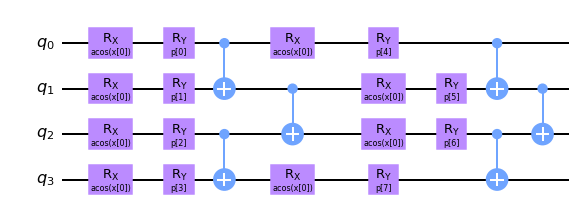

In [2]:
layered = LayeredEncodingCircuit(num_qubits=4,num_features=1)

layered.Rx("x",encoding=np.arccos)
layered.Ry("p")
layered.cx_entangling()
layered.Rx("x",encoding=np.arccos)
layered.Ry("p")
layered.cx_entangling()

layered.draw()

In [3]:
ob = SinglePauli(4,0,parameterized=True)+SinglePauli(4,1,parameterized=True)+SinglePauli(4,2,parameterized=True)+SinglePauli(4,3,parameterized=True)


In [4]:
# Randomly initialize parameters of the encoding circuit
np.random.seed(13)
param_ini =  np.random.rand(layered.num_parameters)
# Initialize parameters of the observable as ones
param_op_ini = np.ones(ob.num_parameters)
x0 = [[i * 0.3] for i in range(15)]
optimizer_options = {"bo_aqc_func": "EI", "bo_aqc_optimizer": "lbfgs", "bo_bounds": [(0.0, 5.0)], "log_file": "sglbo_noiseless.log",
                     "bo_n_calls": 30, "bo_x0_points": x0, "maxiter": 100}

qnn_simulator = QNNRegressor(
    layered,
    ob,
    Executor("statevector_simulator"),
    SquaredLoss(),
    SGLBO(optimizer_options),
    #SLSQP(),
    #Adam({"lr": 0.2,"log_file": "adam_noiseless.log"}),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True, # Keine Observablen optimierung
    parameter_seed=124
)

In [5]:
# Data that is inputted to the QNN
x_train = np.arange(-0.5, 0.6, 0.1)
# Data that is fitted by the QNN
y_train = np.sin(6.0*x_train)

In [2]:
qnn_simulator.fit(x_train, y_train)

KeyboardInterrupt: 

In [7]:
print("Result encoding parameters:", qnn_simulator.param)
print("Result observable parameters:", qnn_simulator.param_op)

Result encoding parameters: [-2.94607858 -1.96628973 -0.0784397   0.07338507  0.23836849 -5.76733394
 -2.85675074  3.17789583]
Result observable parameters: [-0.77396314  2.45588215 -0.14848686  4.19306576]


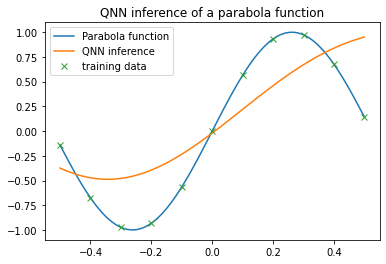

In [8]:
x = np.arange(np.min(x_train), np.max(x_train) + 0.01, 0.01)
y = qnn_simulator.predict(x)  # function for evaluating the prediction of the QNN
plt.plot(x, np.sin(6.0*x), label="Parabola function")
plt.plot(x, y, label="QNN inference")
plt.plot(x_train, y_train, "x", label="training data")
plt.legend()
plt.title("QNN inference of a parabola function")
plt.show()